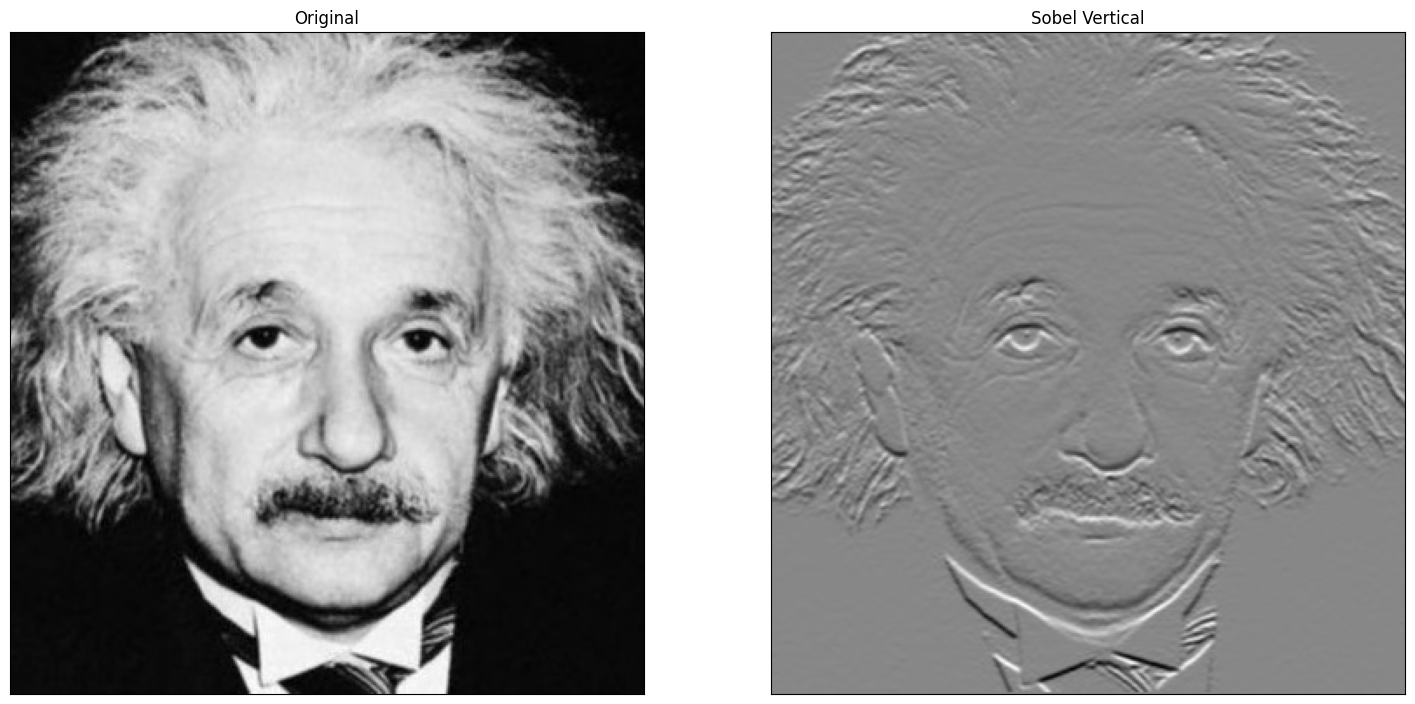

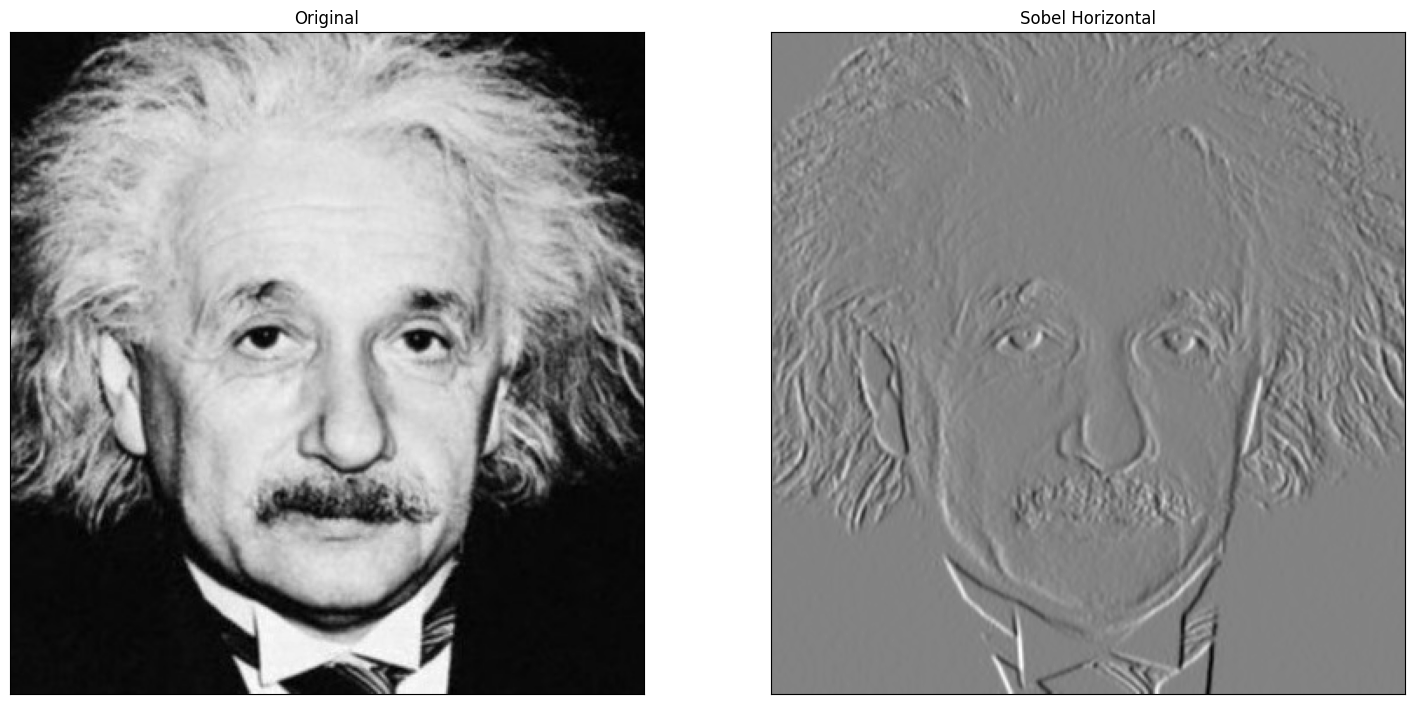

True

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('(7).jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Sobel horizontal
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc1 = cv.filter2D(img,-1,kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc1, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()
#save images in Q7 folder
cv.imwrite('Q7/Original.jpg', img)
cv.imwrite('Q7/Sobel Vertical.jpg', imgc)
cv.imwrite('Q7/Sobel Horizontal.jpg', imgc1)

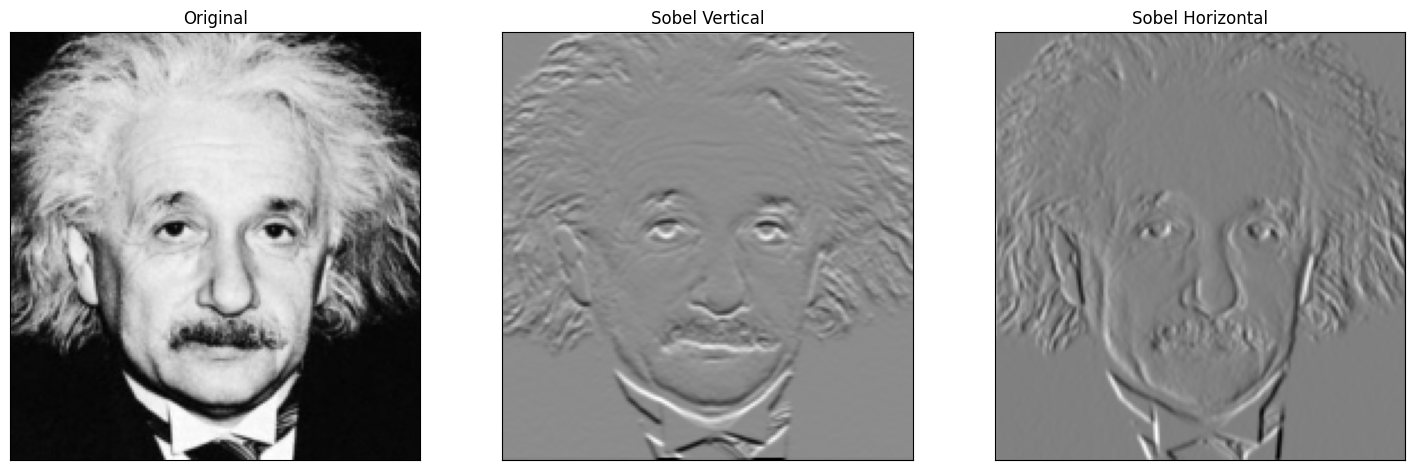

In [4]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image


rows, cols = img.shape[0] , img.shape[1]
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float')

padded = np.zeros((rows+2,cols+2))
for i in range(rows):
    for j in range(cols):
        padded[i+1,j+1] = img[i,j]
f_x = convolution2d(padded, sobel_v)
f_y = convolution2d(padded, sobel_h)
grad = np.sqrt(f_x**2 + f_y**2)

#display images in matplotlib
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(f_x, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(f_y, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])



plt.show()


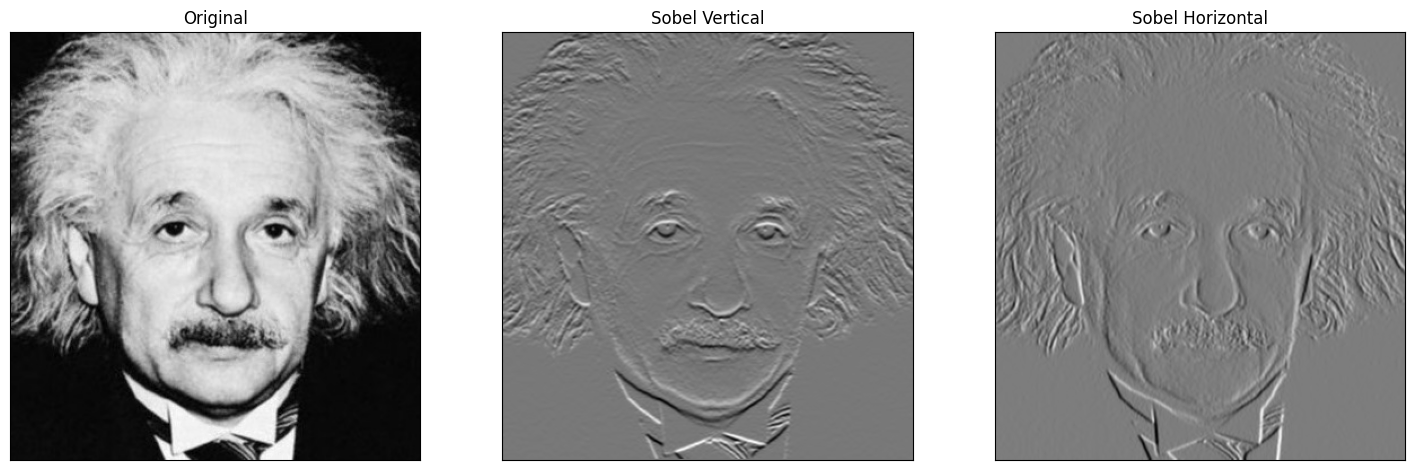

In [10]:

sobel_h1 = np.array([[1],[2],[1]], dtype='float')
sobel_h2 = np.array([[1,0,-1]],dtype='float')
sobel_v1 = np.array([[-1],[0],[1]], dtype='float')
sobel_v2 = np.array([[-1,-2,-1]],dtype='float')
f_y1 = cv.filter2D(img, -1, sobel_h1)
f_y2 = cv.filter2D(f_y1, -1, sobel_h2)
f_x1 = cv.filter2D(img, -1, sobel_v1)
f_x2 = cv.filter2D(f_x1, -1, sobel_v2)

#display images in matplotlib
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(f_x2, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(f_y2, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()